In [321]:
import requests
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

In [153]:
pd.set_option('display.max_columns',None)

In [236]:
charbus = requests.get(r"https://api.census.gov/data/2018/abscb?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX_LABEL,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,QDESC_LABEL,QDESC,BUSCHAR_LABEL,BUSCHAR,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,EMP_PCT_S&for=us:*&key=5300ecc3ee851ff109bf5d9e57ec58a8f531f860")

In [237]:
charbus.text

'[["GEO_ID","NAME","NAICS2017","NAICS2017_LABEL","SEX_LABEL","ETH_GROUP_LABEL","RACE_GROUP","RACE_GROUP_LABEL","QDESC_LABEL","QDESC","BUSCHAR_LABEL","BUSCHAR","YEAR","FIRMPDEMP","FIRMPDEMP_F","FIRMPDEMP_PCT","FIRMPDEMP_PCT_F","RCPPDEMP","RCPPDEMP_F","RCPPDEMP_PCT","EMP","EMP_F","EMP_PCT","EMP_PCT_F","PAYANN","PAYANN_F","PAYANN_PCT","PAYANN_PCT_F","EMP_S","EMP_PCT_S","us"],\n["0100000US","United States","00","Total for all sectors","Total","Total","00","Total","OWNRNUM","B01","All firms","A1","2018","5722142",null,"0.0","X","38405539368",null,"0.0","128196406",null,"0.0","X","6937240308",null,"0.0","X","0.5","0.0","1"],\n["0100000US","United States","00","Total for all sectors","Total","Total","00","Total","OWNRNUM","B01","1 person","BQ","2018","1628501",null,"59.1",null,"2270021185",null,"12.2","10991334",null,"20.1",null,"454218390",null,"14.2",null,"1.1","61.6","1"],\n["0100000US","United States","00","Total for all sectors","Total","Total","00","Total","OWNRNUM","B01","2 to 4 people

In [238]:
charbus = charbus.json()

In [239]:
cb = pd.DataFrame(charbus[1:], columns=charbus[0])

In [240]:
cb.shape

(7196, 31)

In [692]:
cb['FIRMPDEMP'].unique()

array(['5722142', '1628501', '1024784', ..., '2603', '5443', '1053'],
      dtype=object)

In [275]:
# Agriculture, forestry with ethnicity
agri_contractors = cb[(cb.QDESC == 'B20') & 
             (cb.BUSCHAR == 'JY') & 
             (cb.RACE_GROUP_LABEL != 'Total') & 
             (cb.NAICS2017_LABEL != 'Total for all sectors') &
             (cb.NAICS2017_LABEL == 'Agriculture, forestry, fishing and hunting')]

# Mining, quarrying, and oil and gas
mining_cb = cb[(cb.QDESC == 'B20') & 
             (cb.BUSCHAR == 'JY') & 
             (cb.RACE_GROUP_LABEL != 'Total') & 
             (cb.NAICS2017_LABEL != 'Total for all sectors') &
             (cb.NAICS2017_LABEL == 'Mining, quarrying, and oil and gas extraction')]

## Get table with minority & nonminority data for clustered chart

In [314]:
cb[(cb.QDESC == 'B20') & 
             (cb.BUSCHAR == 'JU') & 
             (cb.RACE_GROUP_LABEL != 'Total') & 
             (cb.NAICS2017_LABEL == 'Total for all sectors')]

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX_LABEL,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,QDESC_LABEL,QDESC,BUSCHAR_LABEL,BUSCHAR,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,EMP_S,EMP_PCT_S,us
266,0100000US,United States,00,Total for all sectors,Total,Total,50,American Indian and Alaska Native,WORKERS,B20,Part-time paid employees,JU,2018,4718,None,48.7,None,4306416,None,53.2,35628,None,68.2,None,1089066,None,57.3,None,10.3,4.0,1
276,0100000US,United States,00,Total for all sectors,Total,Total,40,Black or African American,WORKERS,B20,Part-time paid employees,JU,2018,21177,None,51.5,None,19039894,None,61.8,212485,None,73.2,None,5841018,None,65.8,None,10.3,3.6,1
286,0100000US,United States,00,Total for all sectors,Total,Total,30,White,WORKERS,B20,Part-time paid employees,JU,2018,1051587,None,51.0,None,2651646212,None,66.3,13507992,None,73.9,None,525237751,None,64.8,None,1.3,0.6,1
298,0100000US,United States,00,Total for all sectors,Total,Total,60,Asian,WORKERS,B20,Part-time paid employees,JU,2018,119964,None,56.1,None,180248267,None,64.2,1306725,None,78.5,None,38511516,None,67.0,None,2.4,4.6,1
306,0100000US,United States,00,Total for all sectors,Total,Total,91,Equally minority/nonminority,WORKERS,B20,Part-time paid employees,JU,2018,19559,None,55.8,None,35060699,None,68.1,236599,None,77.2,None,9240206,None,70.8,None,6.8,1.9,1
316,0100000US,United States,00,Total for all sectors,Total,Total,90,Minority,WORKERS,B20,Part-time paid employees,JU,2018,201885,None,52.3,None,295912539,None,62.2,2239903,None,74.9,None,67890911,None,65.4,None,2.7,3.6,1
326,0100000US,United States,00,Total for all sectors,Total,Total,70,Native Hawaiian and Other Pacific Islander,WORKERS,B20,Part-time paid employees,JU,2018,1365,None,60.3,None,2838973,None,62.8,16418,None,71.9,None,566708,None,69.7,None,28.9,12.4,1
334,0100000US,United States,00,Total for all sectors,Total,Total,92,Nonminority,WORKERS,B20,Part-time paid employees,JU,2018,977618,None,51.3,None,2532519059,None,66.6,12624606,None,74.2,None,495624321,None,64.9,None,1.3,0.5,1


In [503]:
cb[
    (cb.RCPPDEMP != '0') &
    (cb.RACE_GROUP != 'Total') &
    (cb.BUSCHAR_LABEL == 'All firms')]

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX_LABEL,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,QDESC_LABEL,QDESC,BUSCHAR_LABEL,BUSCHAR,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,EMP_S,EMP_PCT_S,us
0,0100000US,United States,00,Total for all sectors,Total,Total,00,Total,OWNRNUM,B01,All firms,A1,2018,5722142,None,0.0,X,38405539368,None,0.0,128196406,None,0.0,X,6937240308,None,0.0,X,0.5,0.0,1
8,0100000US,United States,00,Total for all sectors,Total,Total,30,White,OWNRNUM,B01,All firms,A1,2018,4769883,None,0.0,X,13303162548,None,0.0,56877432,None,0.0,X,2580104120,None,0.0,X,1.1,0.0,1
16,0100000US,United States,00,Total for all sectors,Total,Total,40,Black or African American,OWNRNUM,B01,All firms,A1,2018,124551,None,0.0,X,128012399,None,0.0,1188819,None,0.0,X,36939229,None,0.0,X,5.5,0.0,1
20,0100000US,United States,00,Total for all sectors,Total,Total,50,American Indian and Alaska Native,OWNRNUM,B01,All firms,A1,2018,24433,None,0.0,X,33697503,None,0.0,200256,None,0.0,X,8241262,None,0.0,X,7.8,0.0,1
32,0100000US,United States,00,Total for all sectors,Total,Total,60,Asian,OWNRNUM,B01,All firms,A1,2018,577835,None,0.0,X,863324218,None,0.0,5090065,None,0.0,X,175800264,None,0.0,X,2.1,0.0,1
40,0100000US,United States,00,Total for all sectors,Total,Total,90,Minority,OWNRNUM,B01,All firms,A1,2018,1048323,None,0.0,X,1481618918,None,0.0,9432081,None,0.0,X,323027545,None,0.0,X,1.5,0.0,1
48,0100000US,United States,00,Total for all sectors,Total,Total,70,Native Hawaiian and Other Pacific Islander,OWNRNUM,B01,All firms,A1,2018,6653,None,0.0,X,11177012,None,0.0,54446,None,0.0,X,2127545,None,0.0,X,18.2,0.0,1
56,0100000US,United States,00,Total for all sectors,Total,Total,91,Equally minority/nonminority,OWNRNUM,B01,All firms,A1,2018,86633,None,0.0,X,134100469,None,0.0,843404,None,0.0,X,33940273,None,0.0,X,7.0,0.0,1
64,0100000US,United States,00,Total for all sectors,Total,Total,92,Nonminority,OWNRNUM,B01,All firms,A1,2018,4364169,None,0.0,X,12741759927,None,0.0,53190299,None,0.0,X,2451472104,None,0.0,X,1.0,0.0,1
72,0100000US,United States,00,Total for all sectors,Total,Total,50,American Indian and Alaska Native,FAMOWN,B02,All firms,A1,2018,24433,None,0.0,X,33697503,None,0.0,200256,None,0.0,X,8241262,None,0.0,X,7.8,0.0,1


In [485]:
cb[(cb.BUSCHAR == 'A1') &
    (cb.RACE_GROUP == '00') &
     (cb.NAICS2017 != '00') &
     (cb.QDESC == 'B01')]

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX_LABEL,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,QDESC_LABEL,QDESC,BUSCHAR_LABEL,BUSCHAR,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,EMP_S,EMP_PCT_S,us
478,0100000US,United States,11,"Agriculture, forestry, fishing and hunting",Total,Total,00,Total,OWNRNUM,B01,All firms,A1,2018,26074,None,0.0,X,0,W,0.0,599905,None,0.0,X,11184335,None,0.0,X,23.9,0.0,1
837,0100000US,United States,21,"Mining, quarrying, and oil and gas extraction",Total,Total,00,Total,OWNRNUM,B01,All firms,A1,2018,19195,None,0.0,X,0,W,0.0,638283,None,0.0,X,60692728,None,0.0,X,5.4,0.0,1
901,0100000US,United States,22,Utilities,Total,Total,00,Total,OWNRNUM,B01,All firms,A1,2018,6062,None,0.0,X,0,W,0.0,673993,None,0.0,X,71506415,None,0.0,X,2.5,0.0,1
1325,0100000US,United States,23,Construction,Total,Total,00,Total,OWNRNUM,B01,All firms,A1,2018,710826,None,0.0,X,0,W,0.0,6754898,None,0.0,X,424172015,None,0.0,X,2.6,0.0,1
1579,0100000US,United States,31-33,Manufacturing,Total,Total,00,Total,OWNRNUM,B01,All firms,A1,2018,246442,None,0.0,X,0,W,0.0,12006094,None,0.0,X,724009247,None,0.0,X,1.2,0.0,1
1909,0100000US,United States,42,Wholesale trade,Total,Total,00,Total,OWNRNUM,B01,All firms,A1,2018,297105,None,0.0,X,0,W,0.0,6109303,None,0.0,X,454494182,None,0.0,X,1.7,0.0,1
2363,0100000US,United States,44-45,Retail trade,Total,Total,00,Total,OWNRNUM,B01,All firms,A1,2018,639706,None,0.0,X,0,W,0.0,15875876,None,0.0,X,462509026,None,0.0,X,2.0,0.0,1
2607,0100000US,United States,48-49,Transportation and warehousing,Total,Total,00,Total,OWNRNUM,B01,All firms,A1,2018,190701,None,0.0,X,0,W,0.0,5049216,None,0.0,X,263999071,None,0.0,X,2.6,0.0,1
2913,0100000US,United States,51,Information,Total,Total,00,Total,OWNRNUM,B01,All firms,A1,2018,81618,None,0.0,X,0,W,0.0,3673165,None,0.0,X,390433031,None,0.0,X,1.8,0.0,1
3348,0100000US,United States,52,Finance and insurance,Total,Total,00,Total,OWNRNUM,B01,All firms,A1,2018,237033,None,0.0,X,0,W,0.0,6643953,None,0.0,X,681850345,None,0.0,X,2.2,0.0,1


In [487]:
revenue = cb[(cb.BUSCHAR == 'A1') &
    (cb.RACE_GROUP == '00') &
     (cb.NAICS2017 != '00') &
     (cb.QDESC == 'B01')]

In [ ]:
revenue[['NAICS2017_LABEL','RCPPDEMP']]

In [468]:
# businesses that use part-time employees, but not exclusively
total_cb = cb[(cb.QDESC == 'B20') & 
             (cb.BUSCHAR == 'JU') & 
             (cb.RACE_GROUP_LABEL != 'Total') & 
             (cb.NAICS2017_LABEL == 'Total for all sectors')]

# get minority/nonminority counts 
t_cb = total_cb[(total_cb.RACE_GROUP_LABEL == 'Minority') |
              (total_cb.RACE_GROUP_LABEL == 'Nonminority')]

t_chart = t_cb[['NAICS2017_LABEL','RACE_GROUP_LABEL','FIRMPDEMP','PAYANN']]

t_chart['FIRMPDEMP'] = t_chart['FIRMPDEMP'].astype('int')

pivot_t = t_chart[['NAICS2017_LABEL','RACE_GROUP_LABEL','FIRMPDEMP']].pivot(index='NAICS2017_LABEL', columns='RACE_GROUP_LABEL')



C:\Users\erick\AppData\Local\Temp/ipykernel_13432/2875294047.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_chart['FIRMPDEMP'] = t_chart['FIRMPDEMP'].astype('int')


In [470]:
pay_chart = t_cb[['NAICS2017_LABEL','RACE_GROUP_LABEL','FIRMPDEMP','PAYANN']]
pay_chart['PAYANN'] = pay_chart['PAYANN'].astype('int')

C:\Users\erick\AppData\Local\Temp/ipykernel_13432/499518562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pay_chart['PAYANN'] = pay_chart['PAYANN'].astype('int')


In [471]:
pivot_pay = pay_chart[['NAICS2017_LABEL','RACE_GROUP_LABEL','PAYANN']].pivot(index='NAICS2017_LABEL', columns='RACE_GROUP_LABEL')

In [473]:
pivot_pay

PAYANN            
RACE_GROUP_LABEL       Minority Nonminority
NAICS2017_LABEL                            
Total for all sectors  67890911   495624321

# CHART 1 - Overall Min vs. Nonmin

In [543]:
pivot_t.rename(columns={('FIRMPDEMP', 'Nonminority'):('FIRMPDEMP', 'Non-Minority')})

FIRMPDEMP            
RACE_GROUP_LABEL       Minority Nonminority
NAICS2017_LABEL                            
Total for all sectors    201885      977618

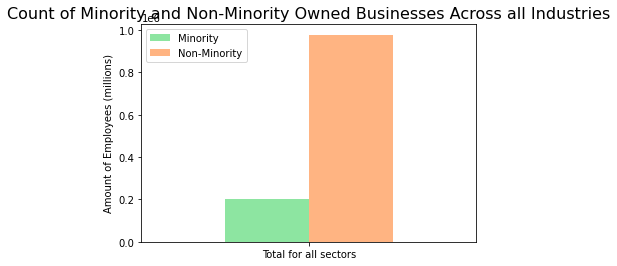

In [801]:
ax = pivot_t.plot(kind='bar',y='FIRMPDEMP',color=['#8DE5A1','#FFB482'])
plt.title("Count of Minority and Non-Minority Owned Businesses Across all Industries",fontdict={'fontsize':16})
plt.ylabel('Amount of Employees (millions)')
plt.xlabel('')

ax.legend(['Minority', 'Non-Minority'])
plt.xticks(rotation=0)
plt.savefig('employeecountminorities.jpg')

In [466]:
pivot_t.plot(kind='bar',y='PAYANN')
plt.title("Count of Minority and Nonminority Owned Businesses Across all Industries")

KeyError: 'PAYANN'

# CHART 2 - TOP 5 INDUSTRIES FOR MINORITY OWNERS

In [747]:
topfive = cb[(cb.QDESC == 'B20') & 
     (cb.BUSCHAR == 'A1') & 
     (cb.RACE_GROUP_LABEL != 'Total') & 
     (cb.NAICS2017_LABEL != 'Total for all sectors') 
     ].head(10)

In [768]:
topfivechart = topfive[(topfive.RACE_GROUP_LABEL == 'Minority') |
              (topfive.RACE_GROUP_LABEL == 'Nonminority')]

tf_chart = topfivechart[['NAICS2017_LABEL','RACE_GROUP_LABEL','FIRMPDEMP','PAYANN']]
tf_chart['FIRMPDEMP'] = tf_chart['FIRMPDEMP'].astype('int')

C:\Users\erick\AppData\Local\Temp/ipykernel_13432/1697416852.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf_chart['FIRMPDEMP'] = tf_chart['FIRMPDEMP'].astype('int')


In [769]:
topfive = cb[(cb.BUSCHAR_LABEL == 'All firms') &
   (cb.QDESC_LABEL == 'OWNRNUM')]

In [770]:
topchart = topfive[(cb.RACE_GROUP_LABEL == 'Minority') |
        (cb.RACE_GROUP_LABEL == 'Nonminority')]

C:\Users\erick\AppData\Local\Temp/ipykernel_13432/2101835131.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  topchart = topfive[(cb.RACE_GROUP_LABEL == 'Minority') |


In [776]:
topchart['FIRMPDEMP'] = topchart['FIRMPDEMP'].astype('int')

C:\Users\erick\AppData\Local\Temp/ipykernel_13432/116309516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topchart['FIRMPDEMP'] = topchart['FIRMPDEMP'].astype('int')


In [777]:
pivottop = topchart[['NAICS2017_LABEL','RACE_GROUP_LABEL','FIRMPDEMP']].pivot(index='NAICS2017_LABEL', columns='RACE_GROUP_LABEL')

In [778]:
sorted_all = pivottop.sort_values(by=('FIRMPDEMP',    'Minority'), ascending=False)

In [788]:
sorted_all.reset_index(inplace=True)
sorted_all

NAICS2017_LABEL FIRMPDEMP  \
RACE_GROUP_LABEL                                                     Minority   
0                                             Total for all sectors   1048323   
1                                   Accommodation and food services    194819   
2                                                      Retail trade    148420   
3                                 Health care and social assistance    146986   
4                  Professional, scientific, and technical services    116687   
5                     Other services (except public administration)     95670   
6                                                      Construction     80727   
7                 Administrative and support and waste managemen...     55945   
8                                                   Wholesale trade     50988   
9                                    Transportation and warehousing     36838   
10                               Real estate and rental and leasing     34070   
11                                            Finance and insurance     25736   
12                                                    Manufacturing     23336   
13                                             Educational services     12775   
14                              Arts, entertainment, and recreation     12132   
15                                                      Information     10562   
16                                        Industries not classified      1165   
17                    Mining, quarrying, and oil and gas extraction      1039   
18                          Management of companies and enterprises      1020   
19                                                        Utilities       178   
20                       Agriculture, forestry, fishing and hunting         0   

                              
RACE_GROUP_LABEL Nonminority  
0                    4364169  
1                     319257  
2                     472502  
3                     419781  
4                     670457  
5                     287267  
6                     617676  
7                     274946  
8                     232518  
9                     146503  
10                    267246  
11                    195787  
12                    209591  
13                     51805  
14                     93827  
15                     61227  
16                     19693  
17                     16231  
18                     15470  
19                      2788  
20                     23104

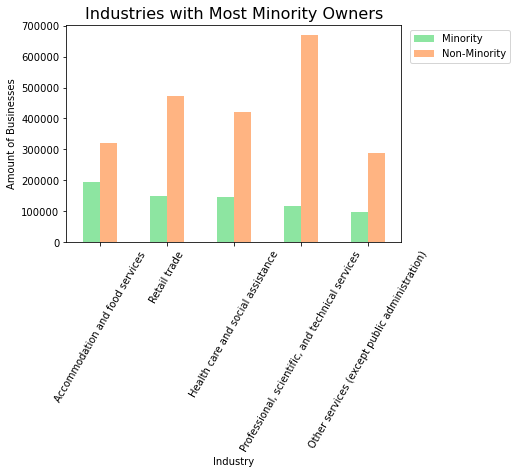

In [800]:
ax = sorted_all[:6].drop(sorted_all.index[0]).plot(kind='bar',
                                                   y='FIRMPDEMP',
                                                  x='NAICS2017_LABEL',
                                                  color=['#8DE5A1','#FFB482'])
plt.xticks(rotation=60)
plt.title('Industries with Most Minority Owners',fontdict={'fontsize':16})
plt.ylabel('Amount of Businesses')
plt.xlabel('Industry')
plt.legend(['Minority', 'Non-Minority'],bbox_to_anchor = (1.01, 1.0))

In [334]:
sorted_pt = pivot_pt.sort_values(by=('FIRMPDEMP',    'Minority'), ascending=False)

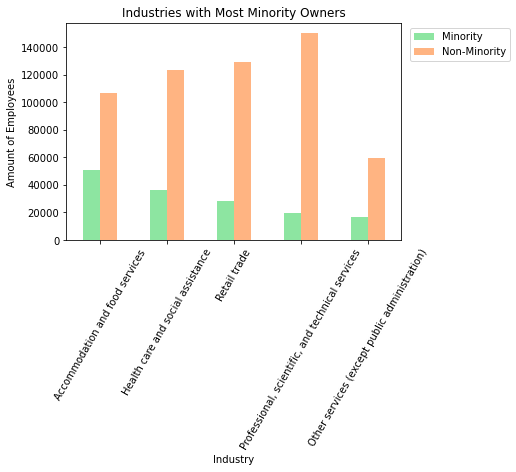

In [797]:
ax = sorted_pt[:5].plot(kind='bar',y='FIRMPDEMP', color=['#8DE5A1','#FFB482'])
plt.xticks(rotation=60)
plt.title('Industries with Most Minority Owners')
plt.ylabel('Amount of Employees')
plt.xlabel('Industry')
plt.legend(['Minority', 'Non-Minority'],bbox_to_anchor = (1.01, 1.0))

# ax.legend(['Minority', 'Non-Minority'])
plt.savefig('IndustriesMostMinorities.jpg')

In [356]:
# businesses that use part-time employees, but not exclusively
total_cb = cb[(cb.QDESC == 'B06') & 
             (cb.BUSCHAR == 'A1') & 
             (cb.RACE_GROUP_LABEL != 'Total') & 
             (cb.NAICS2017_LABEL == 'Total for all sectors')]

# get minority/nonminority counts 
t_cb = total_cb[(total_cb.RACE_GROUP_LABEL == 'Minority') |
              (total_cb.RACE_GROUP_LABEL == 'Nonminority')]

t_chart = t_cb[['NAICS2017_LABEL','RACE_GROUP_LABEL','FIRMPDEMP','PAYANN']]

t_chart['FIRMPDEMP'] = t_chart['FIRMPDEMP'].astype('int')

pivot_t = t_chart[['NAICS2017_LABEL','RACE_GROUP_LABEL','FIRMPDEMP']].pivot(index='NAICS2017_LABEL', columns='RACE_GROUP_LABEL')

pivot_t.plot(kind='bar',y='FIRMPDEMP')
plt.title("Count of Minority and Nonminority Owned Businesses Across all Industries")

KeyError: 'FIRMPDEMP'

In [355]:
pivot_t[('FIRMPDEMP', "Minority")]

NAICS2017_LABEL
Total for all sectors    1048323
Name: (FIRMPDEMP, Minority), dtype: int32

In [390]:
asian_owners = cb[(cb.QDESC == 'B01') & 
             (cb.RACE_GROUP_LABEL == 'Asian') & 
             (cb.NAICS2017_LABEL == 'Total for all sectors') &
             (cb.BUSCHAR_LABEL != 'All firms') &
             (cb.BUSCHAR_LABEL != 'Total reporting') &
             (cb.BUSCHAR_LABEL != 'Item not reported') &
             (cb.BUSCHAR_LABEL != 'Unkown number of owners')]

asian_owned_ownernum = asian_owners[['BUSCHAR_LABEL','FIRMPDEMP']]
asian_owned_ownernum['FIRMPDEMP'] = asian_owned_ownernum['FIRMPDEMP'].astype('int')

C:\Users\erick\AppData\Local\Temp/ipykernel_13432/2659274639.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asian_owned_ownernum['FIRMPDEMP'] = asian_owned_ownernum['FIRMPDEMP'].astype('int')


<AxesSubplot:xlabel='BUSCHAR_LABEL'>

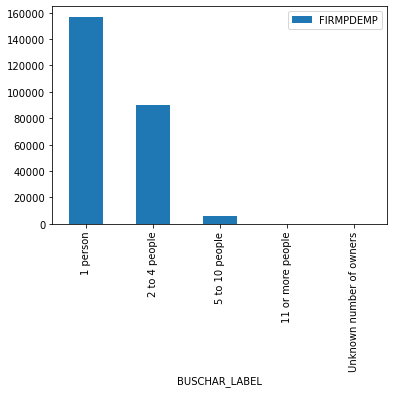

In [391]:
asian_owned_ownernum.plot(kind='bar',y='FIRMPDEMP', x='BUSCHAR_LABEL')

In [617]:
ethnicity_owners = cb[(cb.QDESC == 'B01') & 
             (cb.RACE_GROUP_LABEL == 'Asian') &
             (cb.RACE_GROUP_LABEL != 'Unclassifiable') &
             (cb.RACE_GROUP_LABEL != 'Classifiable') &
             (cb.RACE_GROUP_LABEL != 'Nonminority') &
             (cb.RACE_GROUP_LABEL != 'Equally minority/nonminority') &
             (cb.RACE_GROUP_LABEL != 'Minority') &
             (cb.NAICS2017_LABEL == 'Accommodation and food services') &
             (cb.BUSCHAR_LABEL != 'All firms') &
             (cb.BUSCHAR_LABEL != 'Total reporting') &
             (cb.BUSCHAR_LABEL != 'Item not reported') &
             (cb.BUSCHAR_LABEL != 'Unknown number of owners')]

ownernum_ethnicity = ethnicity_owners[['RACE_GROUP_LABEL','BUSCHAR_LABEL','FIRMPDEMP']]
ownernum_ethnicity['FIRMPDEMP'] = ownernum_ethnicity['FIRMPDEMP'].astype('int')

C:\Users\erick\AppData\Local\Temp/ipykernel_13432/1429545481.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ownernum_ethnicity['FIRMPDEMP'] = ownernum_ethnicity['FIRMPDEMP'].astype('int')


In [618]:
ownernum_ethnicity

,RACE_GROUP_LABEL,BUSCHAR_LABEL,FIRMPDEMP
6188,Asian,1 person,26721
6189,Asian,2 to 4 people,24579
6190,Asian,5 to 10 people,2087
6191,Asian,11 or more people,150


# CHART 3 OWNER COUNT WITHIN ASIAN FOOD SERVICE INDUSTRY

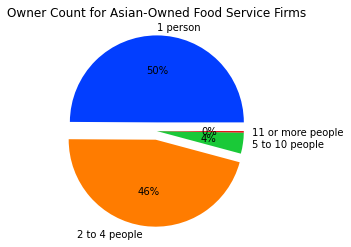

In [731]:
plt.pie(ownernum_ethnicity.FIRMPDEMP,
        labels=ownernum_ethnicity.BUSCHAR_LABEL,
        colors=seaborn.color_palette('bright'),
        explode=[0.1,0.1,0,0],
        autopct='%.0f%%')

plt.title('Owner Count for Asian-Owned Food Service Firms')
plt.savefig('AsianOwnerCount.jpg')

In [713]:
cb['QDESC_LABEL'].unique()

array(['OWNRNUM', 'FAMOWN', 'SPOUSES', 'CUST', 'WORKERS', 'CEASEOPS'],
      dtype=object)

In [735]:
cb[(cb.QDESC_LABEL == 'FAMOWN') & 
#              (cb.RACE_GROUP_LABEL != 'Total') &
#              (cb.RACE_GROUP_LABEL != 'Unclassifiable') &
#              (cb.RACE_GROUP_LABEL != 'Classifiable') &
#              (cb.RACE_GROUP_LABEL != 'Nonminority') &
#              (cb.RACE_GROUP_LABEL != 'Equally minority/nonminority') &
             (cb.RACE_GROUP_LABEL == 'Asian') &
             (cb.NAICS2017_LABEL == 'Accommodation and food services') &
             (cb.BUSCHAR_LABEL != 'All firms') &
             (cb.BUSCHAR_LABEL != 'Total reporting') &
             (cb.BUSCHAR_LABEL != 'Item not reported') &
             (cb.BUSCHAR_LABEL != 'Unknown number of owners')]

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX_LABEL,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,QDESC_LABEL,QDESC,BUSCHAR_LABEL,BUSCHAR,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,EMP_S,EMP_PCT_S,us
6119,0100000US,United States,72,Accommodation and food services,Total,Total,60,Asian,FAMOWN,B02,Family-owned,BM,2018,17792,None,33.1,None,0,W,0.0,218637,None,36.5,None,4160229,None,36.6,None,5.5,1.3,1
6120,0100000US,United States,72,Accommodation and food services,Total,Total,60,Asian,FAMOWN,B02,Not family-owned,BN,2018,35925,None,66.9,None,0,W,0.0,380433,None,63.5,None,7195592,None,63.4,None,4.3,1.3,1


In [721]:
racefamown = cb[(cb.QDESC_LABEL == 'FAMOWN') & 
             (cb.RACE_GROUP_LABEL != 'Total') &
             (cb.RACE_GROUP_LABEL != 'Unclassifiable') &
             (cb.RACE_GROUP_LABEL != 'Classifiable') &
             (cb.RACE_GROUP_LABEL != 'Nonminority') &
             (cb.RACE_GROUP_LABEL != 'Equally minority/nonminority') &
             (cb.RACE_GROUP_LABEL == 'Asian') &
             (cb.NAICS2017_LABEL == 'Accommodation and food services') &
             (cb.BUSCHAR_LABEL != 'All firms') &
             (cb.BUSCHAR_LABEL != 'Total reporting') &
             (cb.BUSCHAR_LABEL != 'Item not reported') &
             (cb.BUSCHAR_LABEL != 'Unknown number of owners')]

# CHART 4 FAMILY OWNED ASIAN FOOD INDUSTRY FIRMS

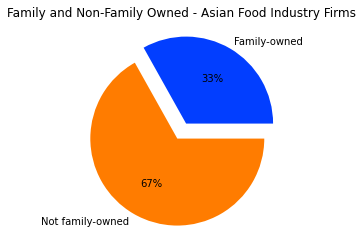

In [734]:
plt.pie(racefamown.FIRMPDEMP,
        labels=racefamown.BUSCHAR_LABEL,
        colors=seaborn.color_palette('bright'),
        explode=[0.1,0.1],
        autopct='%.0f%%')

plt.title('Family and Non-Family Owned - Asian Food Industry Firms')
plt.savefig('AsianFamilyOwned.jpg')

In [431]:
ownernum_pivot = ownernum_ethnicity.pivot(index='BUSCHAR_LABEL', columns='RACE_GROUP_LABEL')

In [432]:
ownernum_pivot

FIRMPDEMP           \
RACE_GROUP_LABEL  American Indian and Alaska Native    Asian   
BUSCHAR_LABEL                                                  
1 person                                      399.0  26721.0   
11 or more people                               NaN    150.0   
2 to 4 people                                   0.0  24579.0   
5 to 10 people                                  NaN   2087.0   

                                             \
RACE_GROUP_LABEL  Black or African American   
BUSCHAR_LABEL                                 
1 person                             1731.0   
11 or more people                       NaN   
2 to 4 people                        1124.0   
5 to 10 people                          0.0   

                                                                       
RACE_GROUP_LABEL  Native Hawaiian and Other Pacific Islander    White  
BUSCHAR_LABEL                                                          
1 person                                               194.0  72442.0  
11 or more people                                        NaN    866.0  
2 to 4 people                                            0.0  76283.0  
5 to 10 people                                           NaN   4903.0

<Figure size 2160x5760 with 0 Axes>

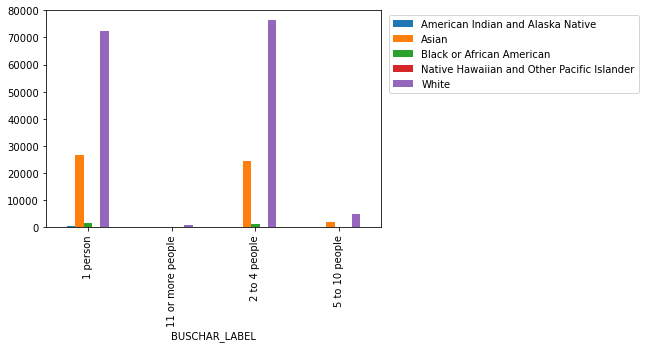

In [425]:
plt.figure(figsize = (30,80))
ownernum_pivot.plot(kind='bar',y='FIRMPDEMP')
plt.legend(bbox_to_anchor = (1.01, 1.0))
plt.show()

<Figure size 2160x5760 with 0 Axes>

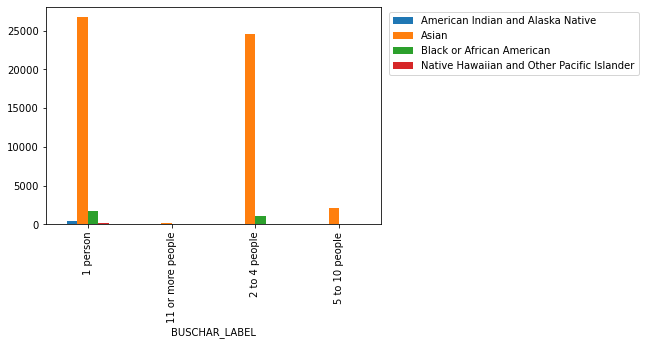

In [426]:
plt.figure(figsize = (30,80))
ownernum_pivot.drop([('FIRMPDEMP','White')],axis=1).plot(kind='bar',y='FIRMPDEMP')
plt.legend(bbox_to_anchor = (1.01, 1.0))
plt.show()

In [434]:
test = ownernum_pivot

In [436]:
test.reset_index(inplace=True)

In [437]:
test

BUSCHAR_LABEL                         FIRMPDEMP  \
RACE_GROUP_LABEL                    American Indian and Alaska Native   
0                          1 person                             399.0   
1                 11 or more people                               NaN   
2                     2 to 4 people                               0.0   
3                    5 to 10 people                               NaN   

                                                     \
RACE_GROUP_LABEL    Asian Black or African American   
0                 26721.0                    1731.0   
1                   150.0                       NaN   
2                 24579.0                    1124.0   
3                  2087.0                       0.0   

                                                                      
RACE_GROUP_LABEL Native Hawaiian and Other Pacific Islander    White  
0                                                     194.0  72442.0  
1                                                       NaN    866.0  
2                                                       0.0  76283.0  
3                                                       NaN   4903.0

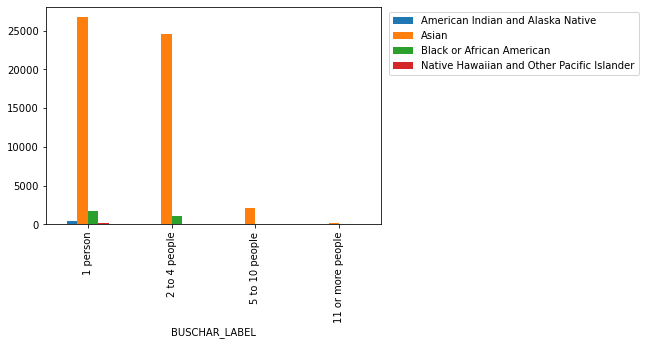

In [505]:
test.reindex([0,2,3,1]).drop([('FIRMPDEMP','White')],axis=1).plot(kind='bar',y='FIRMPDEMP', x='BUSCHAR_LABEL')
plt.legend(bbox_to_anchor = (1.01, 1.0))
plt.show()

In [506]:
pivot_contract

FIRMPDEMP            
RACE_GROUP_LABEL                                    Minority Nonminority
NAICS2017_LABEL                                                         
Accommodation and food services                         7354       21005
Administrative and support and waste management...      7455       39445
Agriculture, forestry, fishing and hunting                 0        4392
Arts, entertainment, and recreation                     1873       14772
Construction                                           15911      145511
Educational services                                    2118        9999
Finance and insurance                                   3459       26029
Health care and social assistance                      21493       61273
Industries not classified                                 20        1065
Information                                             1717       12245
Management of companies and enterprises                  113        1687
Manufacturing                                           2511       28263
Mining, quarrying, and oil and gas extraction            126        1990
Other services (except public administration)           7226       26265
Professional, scientific, and technical services       23367      134782
Real estate and rental and leasing                      5704       48349
Retail trade                                            6450       44618
Transportation and warehousing                          3663       16284
Utilities                                                 19           0
Wholesale trade                                         6253       34754

In [512]:
ethnicity_owners = cb[(cb.QDESC == 'B01') & 
             (cb.RACE_GROUP_LABEL != 'Total') &
             (cb.RACE_GROUP_LABEL != 'Unclassifiable') &
             (cb.RACE_GROUP_LABEL != 'Classifiable') &
             (cb.RACE_GROUP_LABEL != 'Nonminority') &
             (cb.RACE_GROUP_LABEL != 'Equally minority/nonminority') &
             (cb.RACE_GROUP_LABEL != 'Minority') &
             (cb.NAICS2017_LABEL == 'Accommodation and food services') &
             (cb.BUSCHAR_LABEL == 'All firms') &
             (cb.BUSCHAR_LABEL != 'Total reporting') &
             (cb.BUSCHAR_LABEL != 'Item not reported') &
             (cb.BUSCHAR_LABEL != 'Unknown number of owners')]

ownernum_ethnicity = ethnicity_owners[['RACE_GROUP_LABEL','BUSCHAR_LABEL','FIRMPDEMP']]
ownernum_ethnicity['FIRMPDEMP'] = ownernum_ethnicity['FIRMPDEMP'].astype('int')

C:\Users\erick\AppData\Local\Temp/ipykernel_13432/3096340367.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ownernum_ethnicity['FIRMPDEMP'] = ownernum_ethnicity['FIRMPDEMP'].astype('int')


<AxesSubplot:>

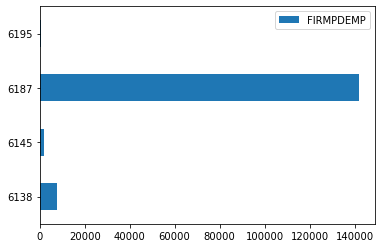

In [515]:
ownernum_ethnicity.drop(ownernum_ethnicity.index[0]).plot(kind='barh', ylabel='')

In [518]:
employee_count = cb[(cb.QDESC == 'B01') & 
             (cb.RACE_GROUP_LABEL != 'Total') &
             (cb.RACE_GROUP_LABEL != 'Unclassifiable') &
             (cb.RACE_GROUP_LABEL != 'Classifiable') &
             (cb.RACE_GROUP_LABEL != 'Nonminority') &
             (cb.RACE_GROUP_LABEL != 'Equally minority/nonminority') &
             (cb.RACE_GROUP_LABEL != 'Minority') &
             (cb.NAICS2017_LABEL == 'Accommodation and food services') &
             (cb.BUSCHAR_LABEL == 'All firms') &
             (cb.BUSCHAR_LABEL != 'Total reporting') &
             (cb.BUSCHAR_LABEL != 'Item not reported') &
             (cb.BUSCHAR_LABEL != 'Unknown number of owners')]

In [521]:
emp_count_ethnicity = employee_count[['RACE_GROUP_LABEL','EMP','FIRMPDEMP']]
emp_count_ethnicity['FIRMPDEMP'] = emp_count_ethnicity['FIRMPDEMP'].astype('int')

C:\Users\erick\AppData\Local\Temp/ipykernel_13432/7022191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_count_ethnicity['FIRMPDEMP'] = emp_count_ethnicity['FIRMPDEMP'].astype('int')


In [525]:
emp_count_ethnicity['EMP'] = emp_count_ethnicity['EMP'].astype('int')

C:\Users\erick\AppData\Local\Temp/ipykernel_13432/3676154441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_count_ethnicity['EMP'] = emp_count_ethnicity['EMP'].astype('int')


In [522]:
emp_count_ethnicity

,RACE_GROUP_LABEL,EMP,FIRMPDEMP
6130,White,8504641,371038
6138,Black or African American,199284,7714
6145,American Indian and Alaska Native,24869,1786
6187,Asian,1784264,141746
6195,Native Hawaiian and Other Pacific Islander,8085,535


# CHART 5 ACC & FOOD RACIAL BREAKDOWN

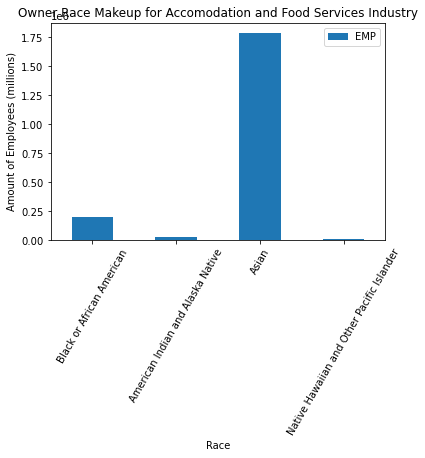

In [802]:
# food services racial breakdown
emp_count_ethnicity.drop(emp_count_ethnicity.index[0]).plot(kind='bar',y='EMP', x='RACE_GROUP_LABEL')
plt.title('Owner Race Makeup for Accomodation and Food Services Industry')
plt.ylabel('Amount of Employees (millions)')
plt.xlabel('Race')
plt.xticks(rotation=60)
plt.savefig('FoodIndustryMinorities.jpg')

In [529]:
healthcare_emp = cb[(cb.QDESC == 'B01') & 
             (cb.RACE_GROUP_LABEL != 'Total') &
             (cb.RACE_GROUP_LABEL != 'Unclassifiable') &
             (cb.RACE_GROUP_LABEL != 'Classifiable') &
             (cb.RACE_GROUP_LABEL != 'Nonminority') &
             (cb.RACE_GROUP_LABEL != 'Equally minority/nonminority') &
             (cb.RACE_GROUP_LABEL != 'Minority') &
             (cb.NAICS2017_LABEL == 'Health care and social assistance') &
             (cb.BUSCHAR_LABEL == 'All firms') &
             (cb.BUSCHAR_LABEL != 'Total reporting') &
             (cb.BUSCHAR_LABEL != 'Item not reported') &
             (cb.BUSCHAR_LABEL != 'Unknown number of owners')]

In [530]:
hc_emp = healthcare_emp[['RACE_GROUP_LABEL','EMP','FIRMPDEMP']]
hc_emp['FIRMPDEMP'] = hc_emp['FIRMPDEMP'].astype('int')

C:\Users\erick\AppData\Local\Temp/ipykernel_13432/733683845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hc_emp['FIRMPDEMP'] = hc_emp['FIRMPDEMP'].astype('int')


In [532]:
hc_emp['EMP'] = hc_emp['EMP'].astype('int')

C:\Users\erick\AppData\Local\Temp/ipykernel_13432/2611466743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hc_emp['EMP'] = hc_emp['EMP'].astype('int')


# CHART 6 HEALTHCARE RACE BREAKDOWN

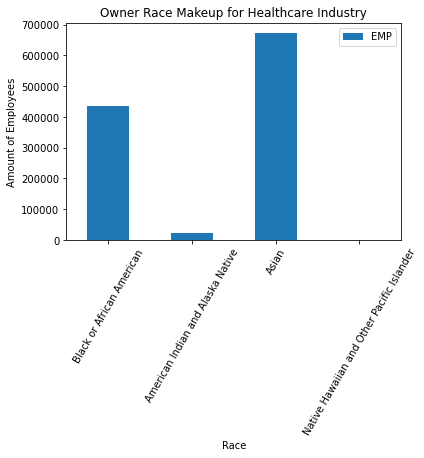

In [733]:
hc_emp.drop(hc_emp.index[0]).plot(kind='bar',y='EMP', x='RACE_GROUP_LABEL')
plt.title('Owner Race Makeup for Healthcare Industry')
plt.ylabel('Amount of Employees')
plt.xlabel('Race')
plt.xticks(rotation=60)
plt.savefig('healthcareminorities.jpg')

In [534]:
retail_emp = cb[(cb.QDESC == 'B01') & 
             (cb.RACE_GROUP_LABEL != 'Total') &
             (cb.RACE_GROUP_LABEL != 'Unclassifiable') &
             (cb.RACE_GROUP_LABEL != 'Classifiable') &
             (cb.RACE_GROUP_LABEL != 'Nonminority') &
             (cb.RACE_GROUP_LABEL != 'Equally minority/nonminority') &
             (cb.RACE_GROUP_LABEL != 'Minority') &
             (cb.NAICS2017_LABEL == 'Retail trade') &
             (cb.BUSCHAR_LABEL == 'All firms') &
             (cb.BUSCHAR_LABEL != 'Total reporting') &
             (cb.BUSCHAR_LABEL != 'Item not reported') &
             (cb.BUSCHAR_LABEL != 'Unknown number of owners')]

r_emp = retail_emp[['RACE_GROUP_LABEL','EMP','FIRMPDEMP']]
r_emp['EMP'] = r_emp['EMP'].astype('int')

C:\Users\erick\AppData\Local\Temp/ipykernel_13432/322012829.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_emp['EMP'] = r_emp['EMP'].astype('int')


# CHART 7 RETAIL RACE BREAKDOWN

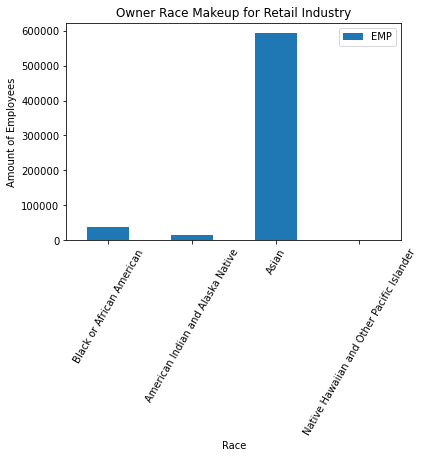

In [730]:
r_emp.drop(r_emp.index[0]).plot(kind='bar',y='EMP', x='RACE_GROUP_LABEL')
plt.title('Owner Race Makeup for Retail Industry')
plt.ylabel('Amount of Employees')
plt.xlabel('Race')
plt.xticks(rotation=60)
plt.savefig('retailminorities.jpg')

In [639]:
cb[(cb.QDESC == 'B01') & 
             (cb.RACE_GROUP_LABEL != 'Total') &
             (cb.RACE_GROUP_LABEL != 'Unclassifiable') &
             (cb.RACE_GROUP_LABEL != 'Classifiable') &
             (cb.RACE_GROUP_LABEL == 'Nonminority') &
             (cb.RACE_GROUP_LABEL != 'Equally minority/nonminority') &
             (cb.RACE_GROUP_LABEL != 'Minority') &
             (cb.NAICS2017_LABEL == 'Accommodation and food services') &
             (cb.BUSCHAR_LABEL == 'All firms') &
             (cb.BUSCHAR_LABEL != 'Total reporting') &
             (cb.BUSCHAR_LABEL != 'Item not reported') &
             (cb.BUSCHAR_LABEL != 'Unknown number of owners')]

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX_LABEL,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,QDESC_LABEL,QDESC,BUSCHAR_LABEL,BUSCHAR,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,EMP_S,EMP_PCT_S,us
6244,0100000US,United States,72,Accommodation and food services,Total,Total,92,Nonminority,OWNRNUM,B01,All firms,A1,2018,319257,None,0.0,X,0,W,0.0,7634642,None,0.0,X,143382454,None,0.0,X,3.2,0.0,1


In [650]:
cb[(cb.RCPPDEMP != '0') &
  (cb.BUSCHAR_LABEL == 'All firms') &
     (cb.RACE_GROUP_LABEL != 'Nonminority') &
     (cb.RACE_GROUP_LABEL != 'Equally minority/nonminority') &
     (cb.RACE_GROUP_LABEL != 'Minority') &
      (cb.QDESC_LABEL == 'OWNRNUM')]

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX_LABEL,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,QDESC_LABEL,QDESC,BUSCHAR_LABEL,BUSCHAR,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,EMP_S,EMP_PCT_S,us
0,0100000US,United States,00,Total for all sectors,Total,Total,00,Total,OWNRNUM,B01,All firms,A1,2018,5722142,None,0.0,X,38405539368,None,0.0,128196406,None,0.0,X,6937240308,None,0.0,X,0.5,0.0,1
8,0100000US,United States,00,Total for all sectors,Total,Total,30,White,OWNRNUM,B01,All firms,A1,2018,4769883,None,0.0,X,13303162548,None,0.0,56877432,None,0.0,X,2580104120,None,0.0,X,1.1,0.0,1
16,0100000US,United States,00,Total for all sectors,Total,Total,40,Black or African American,OWNRNUM,B01,All firms,A1,2018,124551,None,0.0,X,128012399,None,0.0,1188819,None,0.0,X,36939229,None,0.0,X,5.5,0.0,1
20,0100000US,United States,00,Total for all sectors,Total,Total,50,American Indian and Alaska Native,OWNRNUM,B01,All firms,A1,2018,24433,None,0.0,X,33697503,None,0.0,200256,None,0.0,X,8241262,None,0.0,X,7.8,0.0,1
32,0100000US,United States,00,Total for all sectors,Total,Total,60,Asian,OWNRNUM,B01,All firms,A1,2018,577835,None,0.0,X,863324218,None,0.0,5090065,None,0.0,X,175800264,None,0.0,X,2.1,0.0,1
48,0100000US,United States,00,Total for all sectors,Total,Total,70,Native Hawaiian and Other Pacific Islander,OWNRNUM,B01,All firms,A1,2018,6653,None,0.0,X,11177012,None,0.0,54446,None,0.0,X,2127545,None,0.0,X,18.2,0.0,1


In [659]:
revenue_values_by_race = cb[(cb.RCPPDEMP != '0') &
                            (cb.RACE_GROUP_LABEL != 'Total') &
                              (cb.BUSCHAR_LABEL == 'All firms') &
                                 (cb.RACE_GROUP_LABEL != 'Nonminority') &
                                 (cb.RACE_GROUP_LABEL != 'Equally minority/nonminority') &
                                 (cb.RACE_GROUP_LABEL != 'Minority') &
                                  (cb.QDESC_LABEL == 'OWNRNUM')]

In [660]:
ptor = revenue_values_by_race[['RACE_GROUP_LABEL','RCPPDEMP','PAYANN']]

In [670]:
ptor.rename(columns={'RACE_GROUP_LABEL':'Race','RCPPDEMP':'Revenue','PAYANN':'Payroll'},inplace=True)

C:\Users\erick\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [676]:
ptor['Revenue'] = ptor['Revenue'].astype('int64')
ptor['Payroll'] = ptor['Payroll'].astype('int64')

C:\Users\erick\AppData\Local\Temp/ipykernel_13432/2662798931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptor['Revenue'] = ptor['Revenue'].astype('int64')
C:\Users\erick\AppData\Local\Temp/ipykernel_13432/2662798931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptor['Payroll'] = ptor['Payroll'].astype('int64')


In [677]:
ptor['Payroll to Revenue Ratio'] = ptor.apply(lambda row: row['Payroll'] / row['Revenue'], axis=1)

C:\Users\erick\AppData\Local\Temp/ipykernel_13432/4248287302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptor['Payroll to Revenue Ratio'] = ptor.apply(lambda row: row['Payroll'] / row['Revenue'], axis=1)


In [678]:
ptor

,Race,Revenue,Payroll,Payroll to Revenue Ratio
8,White,13303162548,2580104120,0.193947
16,Black or African American,128012399,36939229,0.288560
20,American Indian and Alaska Native,33697503,8241262,0.244566
32,Asian,863324218,175800264,0.203632
48,Native Hawaiian and Other Pacific Islander,11177012,2127545,0.190350


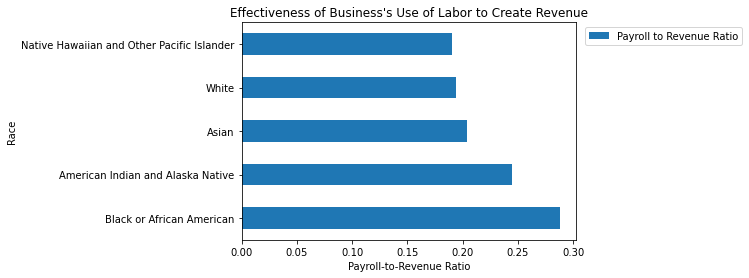

In [690]:
ptor.reindex([16,20,32,8,48]).plot(kind='barh',y='Payroll to Revenue Ratio', x='Race')
plt.title("Effectiveness of Business's Use of Labor to Create Revenue")
plt.xlabel('Payroll-to-Revenue Ratio')
plt.legend(bbox_to_anchor = (1.01, 1.0))